# Feature Extraction for Detection of Phishing Websites

#### Data Collection
This project will be requiring a list of legitimate and phishing websites. 
- The set of phishing URLs are collected from opensource service called **PhishTank**. This service provide a set of phishing URLs in multiple formats like csv, json etc. that gets updated hourly. To download the data: https://www.phishtank.com/developer_info.php. From this dataset, 5000 random phishing URLs are collected to train the ML models.
- The legitimate URLs are obatined from the open datasets of the University of New Brunswick, https://www.unb.ca/cic/datasets/url-2016.html. This dataset has a collection of benign, spam, phishing, malware & defacement URLs. Out of all these types, the benign url dataset is considered for this project. From this dataset, 5000 random legitimate URLs are collected to train the ML models.

In [2]:
# importing necessary libraries
import pandas as pd

In [3]:
df = pd.read_csv("E:\\SYMBIOSIS MSC DSSA\\SUMMER PROJECT\\verified_online.csv")
df.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8684199,https://zokzooke222.blogspot.com/?m=1,http://www.phishtank.com/phish_detail.php?phis...,2024-07-29T06:07:15+00:00,yes,2024-07-29T06:13:19+00:00,yes,Other
1,8684198,https://zokzooke222.blogspot.com,http://www.phishtank.com/phish_detail.php?phis...,2024-07-29T06:07:05+00:00,yes,2024-07-29T06:13:19+00:00,yes,Other
2,8684197,http://b.94-156-64-205.cprapid.com/CREDEM,http://www.phishtank.com/phish_detail.php?phis...,2024-07-29T05:56:44+00:00,yes,2024-07-29T06:04:24+00:00,yes,Other
3,8684196,http://b.94-156-64-205.cprapid.com/CREDEM/,http://www.phishtank.com/phish_detail.php?phis...,2024-07-29T05:56:36+00:00,yes,2024-07-29T06:04:24+00:00,yes,Other
4,8684194,http://swiftsecuredchainlink.pages.dev/,http://www.phishtank.com/phish_detail.php?phis...,2024-07-29T05:55:40+00:00,yes,2024-07-29T06:04:24+00:00,yes,Other


In [4]:
df.shape

(72678, 8)

So this data contains 72678 phishing URLs' and this website keeps updating hourly. So we will be taking a sample of 15000 URLs' to avoid the risk of data imbalance.

In [5]:
phishurl = df.sample(n = 5000,random_state=12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head(10)

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7345854,http://52.20.22.249:8080/BannerTool/HtmlPages/...,http://www.phishtank.com/phish_detail.php?phis...,2021-11-10T08:04:16+00:00,yes,2022-01-27T20:41:33+00:00,yes,Other
1,8681294,https://gestion-entrepots.cc/,http://www.phishtank.com/phish_detail.php?phis...,2024-07-27T02:18:52+00:00,yes,2024-07-27T02:23:25+00:00,yes,Other
2,8169558,https://pub-48d3a24bafe348799aa16e3fbd5ead78.r...,http://www.phishtank.com/phish_detail.php?phis...,2023-06-09T02:49:50+00:00,yes,2023-06-09T02:53:08+00:00,yes,Other
3,8639649,https://dev-4476876576657.pantheonsite.io/,http://www.phishtank.com/phish_detail.php?phis...,2024-07-03T20:48:53+00:00,yes,2024-07-03T20:53:29+00:00,yes,Orange
4,8613787,https://t.co/trp5mH3ZBc,http://www.phishtank.com/phish_detail.php?phis...,2024-06-13T09:31:58+00:00,yes,2024-06-13T09:53:22+00:00,yes,Other
5,8657018,https://ee-recover-bill.web.app/,http://www.phishtank.com/phish_detail.php?phis...,2024-07-15T06:40:25+00:00,yes,2024-07-15T06:53:12+00:00,yes,Other
6,8017961,https://metafb-tvz6efk.firebaseapp.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-01-27T00:35:47+00:00,yes,2023-01-27T00:42:28+00:00,yes,Other
7,8663526,https://rastrobel.com.br/esfera/gomeuspontos864/,http://www.phishtank.com/phish_detail.php?phis...,2024-07-18T16:59:36+00:00,yes,2024-07-18T23:33:34+00:00,yes,ABSA Bank
8,8558456,https://office1f0ad76850dec14666e80fef0bef056d...,http://www.phishtank.com/phish_detail.php?phis...,2024-04-30T13:57:52+00:00,yes,2024-04-30T14:23:32+00:00,yes,Other
9,8651432,https://ionos.es-correo.cpanelactualizar.net/c...,http://www.phishtank.com/phish_detail.php?phis...,2024-07-12T05:47:04+00:00,yes,2024-07-15T16:33:32+00:00,yes,Other


In [6]:
phishurl.shape

(5000, 8)

Here, we collected 5000 phishing URLs' and now we will collect 5000 legitimate URLs'

In [7]:
df1 = pd.read_csv("E:\\SYMBIOSIS MSC DSSA\\SUMMER PROJECT\\Benign_list_big_final.csv")
df1.columns = ['URLs']
df1.head(10)

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...
5,http://1337x.to/torrent/294349/American-Idol-S...
6,http://189.cn/dqmh/userCenter/myOrderInfoList....
7,http://2gis.ru/moscow/search/%D0%9F%D0%BE%D0%B...
8,http://abc.go.com/shows/general-hospital/episo...
9,http://abc.go.com/shows/the-muppets/video/new-...


In [8]:
legiturl = df1.sample(n = 5000, random_state=12).copy()
legiturl = legiturl.reset_index(drop=True)
legiturl.head(10)

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...
5,http://nypost.com/2015/05/07/us-indifference-l...
6,http://kienthuc.net.vn/diem-thi/diem-chuan-dh-...
7,http://thenextweb.com/in/2015/04/16/india-want...
8,http://tobogo.net/cdsb/board.php?board=greet&b...
9,http://akhbarelyom.com/news/newdetails/411395/...


In [9]:
legiturl.shape

(5000, 1)

## Feature Extraction:

In this step, features are extracted from the URLs dataset.

The extracted features are categorized into

1.   Address Bar based Features
2.   Domain based Features
3.   HTML based Features


### Address Bar Based Features:

Many features can be extracted that can be consided as address bar base features. Out of them, below mentioned were considered for this project.


- Domain of URL
- IP Address in URL
- "@" Symbol in URL
- "http/https" in Domain name
- Using URL Shortening Services “TinyURL”
- Prefix or Suffix "-" in Domain

In [10]:
# importing required packages
from urllib.parse import urlparse,urlencode
import ipaddress
import re

**Domain of the URL**

We are extracting the domain present in the URL.

In [11]:
def getDomain(url):
    domain = urlparse(url).netloc
    if re.match(r"^www.", domain):
        domain = domain.replace("www.", "")
    return domain

**IP Address in the URL**

Checks for the presence of IP address in the URL. URLs may have IP address instead of domain name. If an IP address is used as an alternative of the domain name in the URL, we can be sure that someone is trying to steal personal information with this URL.

If the domain part of URL has IP address, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [12]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

**"@" Symbol in URL**

Checks for the presence of '@' symbol in the URL. Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol. 

If the URL has '@' symbol, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [13]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

**"http/https" in Domain name**

Checks for the presence of "http/https" in the domain part of the URL. The phishers may add the “HTTPS” to the domain part of a URL in order to trick users.

If the URL has "http/https" in the domain part, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [14]:
# 4.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

**Using URL Shortening Services “TinyURL”**

URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL. 

If the URL is using Shortening Services, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [15]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

# 5. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

**Prefix or Suffix "-" in Domain**

Checking the presence of '-' in the domain part of URL. The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage. 

If the URL has '-' symbol in the domain part of the URL, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [16]:
# 6.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1
    else:
        return 0

### Domain Based Features:

Below mentioned are the features that are considered for this project.

- Website Traffic 
- End Period of Domain

In [17]:
# pip install python-whois

In [18]:
# importing required packages for this section
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

**Web Traffic**

This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit. However, since phishing websites live for a short period of time, they may not be recognized by the Alexa database (Alexa the Web Information Company., 1996). By reviewing our dataset, we find that in worst scenarios, legitimate websites ranked among the top 100,000. Furthermore, if the domain has no traffic or is not recognized by the Alexa database, it is classified as “Phishing”.

If the rank of the domain < 100000, the value of this feature is 1 (phishing) else 0 (legitimate).

In [19]:
# Web traffic (Web_Traffic)
def web_traffic(url):
  try:
    #Filling the whitespaces in the URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

**Age of Domain**

This feature can be extracted from WHOIS database. Most phishing websites live for a short period of time. The minimum age of the legitimate domain is considered to be 12 months for this project. Age here is nothing but different between creation and expiration time.

If age of domain > 12 months, the value of this feature is 0 (legitimate) else 1 (phishing).

In [20]:
from datetime import datetime

def domainAge(domain_name):
    creation_date = domain_name.creation_date
    expiration_date = domain_name.expiration_date

    # Check if creation_date and expiration_date are strings and parse them
    if isinstance(creation_date, str):
        try:
            creation_date = datetime.strptime(creation_date, '%Y-%m-%d')
        except ValueError:
            return 1
    elif isinstance(creation_date, list):
        creation_date = creation_date[0]

    if isinstance(expiration_date, str):
        try:
            expiration_date = datetime.strptime(expiration_date, '%Y-%m-%d')
        except ValueError:
            return 1
    elif isinstance(expiration_date, list):
        expiration_date = expiration_date[0]

    # Check if dates are None
    if creation_date is None or expiration_date is None:
        return 1

    # Calculate the age of the domain in days
    ageofdomain = abs((expiration_date - creation_date).days)
    
    # Determine if the age is less than 6 months
    if (ageofdomain / 30) < 6:
        age = 1
    else:
        age = 0

    return age


### HTML Based Features
- IFrame Redirection

In [21]:
# importing required packages for this section
import requests

**IFrame Redirection**

An IFrame is an HTML tag used to display an additional webpage within the current webpage. Phishers can exploit the iframe tag by making it invisible (i.e., without frame borders). They use the frameBorder attribute to prevent the browser from rendering a visual delineation.

If the iframe is empty or the response is not found, the value assigned to this feature is 1 (phishing); otherwise, it is 0 (legitimate).

In [22]:
def iframe(response):
    if response == "":
        return 1
    else:
        if re.findall(r"<iframe>|<frameBorder>", response.text):
            return 0
        else:
            return 1

**Computing URL Features**

We create a list and a function that calls the other functions and stores all the features of the URL in the list. We will extract the features of each URL and append to this list.

In [23]:
def featureExtraction(url, label):
    features = []
    # Address bar based features
    features.append(getDomain(url))
    features.append(havingIP(url))
    features.append(haveAtSign(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(prefixSuffix(url))
    
    # Domain based features
    dns = 0
    try:
        domain_name = whois.whois(urlparse(url).netloc)
    except Exception as e:
        dns = 1

    features.append(web_traffic(url))
    features.append(1 if dns == 1 else domainAge(domain_name))
    
    # HTML
    try:
        response = requests.get(url)
    except requests.exceptions.RequestException as e:
        response = None
    features.append(iframe(response))
    features.append(label)
    
    return features


In [24]:
legiturl.shape

(5000, 1)

## FINAL DATASET

In [25]:
# concatenating the legitimate and phishing urls
legitimate = pd.read_csv("E:\\SYMBIOSIS MSC DSSA\\SUMMER PROJECT\\legitimate.csv")
phishing = pd.read_csv("E:\\SYMBIOSIS MSC DSSA\\SUMMER PROJECT\\phishing.csv")
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head(10)

,Domain,Have_IP,Have_At,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_End,iFrame,Label
0,graphicriver.net,0,0,0,0,0,0,1,1,0,0
1,ecnavi.jp,0,0,0,0,0,0,1,1,0,0
2,hubpages.com,0,0,0,0,0,0,1,1,0,0
3,extratorrent.cc,0,0,0,0,0,0,1,1,0,0
4,icicibank.com,0,0,0,0,0,0,1,1,0,0
5,nypost.com,0,0,0,1,0,0,1,1,0,0
6,kienthuc.net.vn,0,0,0,0,0,1,1,1,0,0
7,thenextweb.com,0,0,0,0,0,0,1,0,0,0
8,tobogo.net,0,0,0,0,0,0,1,0,0,0
9,akhbarelyom.com,0,0,0,0,0,0,1,1,0,0


In [26]:
urldata.shape

(10000, 11)

# DATA PREPROCESSING

In [27]:
urldata.head(10)

,Domain,Have_IP,Have_At,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_End,iFrame,Label
0,graphicriver.net,0,0,0,0,0,0,1,1,0,0
1,ecnavi.jp,0,0,0,0,0,0,1,1,0,0
2,hubpages.com,0,0,0,0,0,0,1,1,0,0
3,extratorrent.cc,0,0,0,0,0,0,1,1,0,0
4,icicibank.com,0,0,0,0,0,0,1,1,0,0
5,nypost.com,0,0,0,1,0,0,1,1,0,0
6,kienthuc.net.vn,0,0,0,0,0,1,1,1,0,0
7,thenextweb.com,0,0,0,0,0,0,1,0,0,0
8,tobogo.net,0,0,0,0,0,0,1,0,0,0
9,akhbarelyom.com,0,0,0,0,0,0,1,1,0,0


In [28]:
urldata.shape

(10000, 11)

In [29]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
urldata.columns

Index(['Domain', 'Have_IP', 'Have_At', 'https_Domain', 'TinyURL',
       'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Domain_End', 'iFrame',
       'Label'],
      dtype='object')

In [31]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   https_Domain   10000 non-null  int64 
 4   TinyURL        10000 non-null  int64 
 5   Prefix/Suffix  10000 non-null  int64 
 6   DNS_Record     10000 non-null  int64 
 7   Web_Traffic    10000 non-null  int64 
 8   Domain_End     10000 non-null  int64 
 9   iFrame         10000 non-null  int64 
 10  Label          10000 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 859.5+ KB


### Visualizing the data

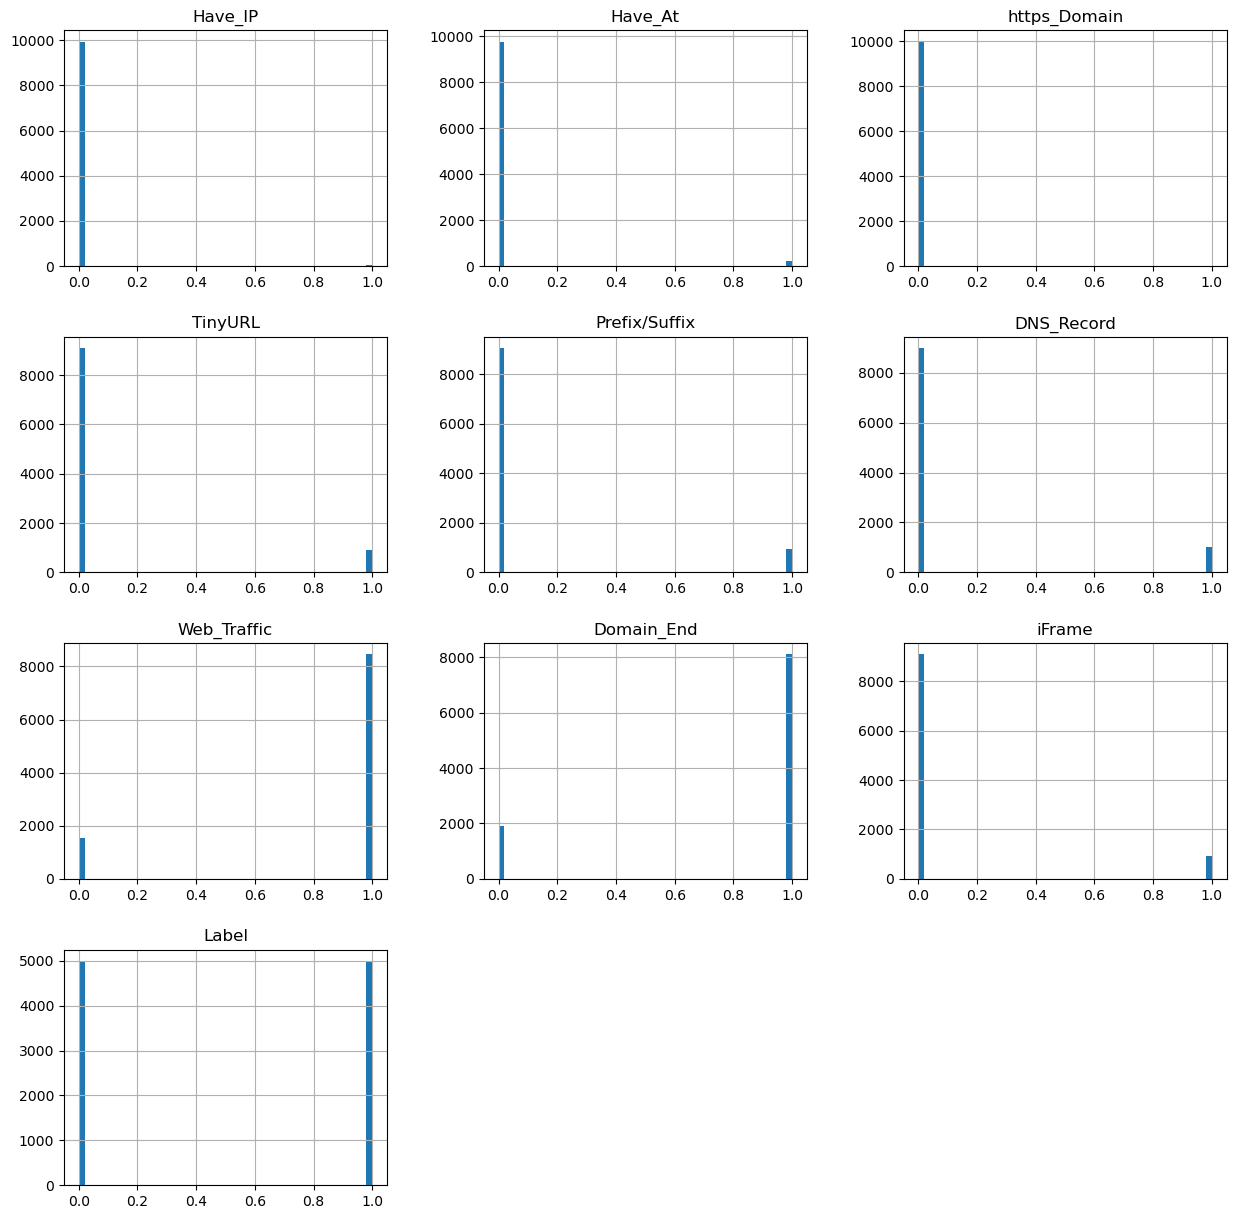

In [32]:
urldata.hist(bins=50,figsize=(15,15))
plt.show()

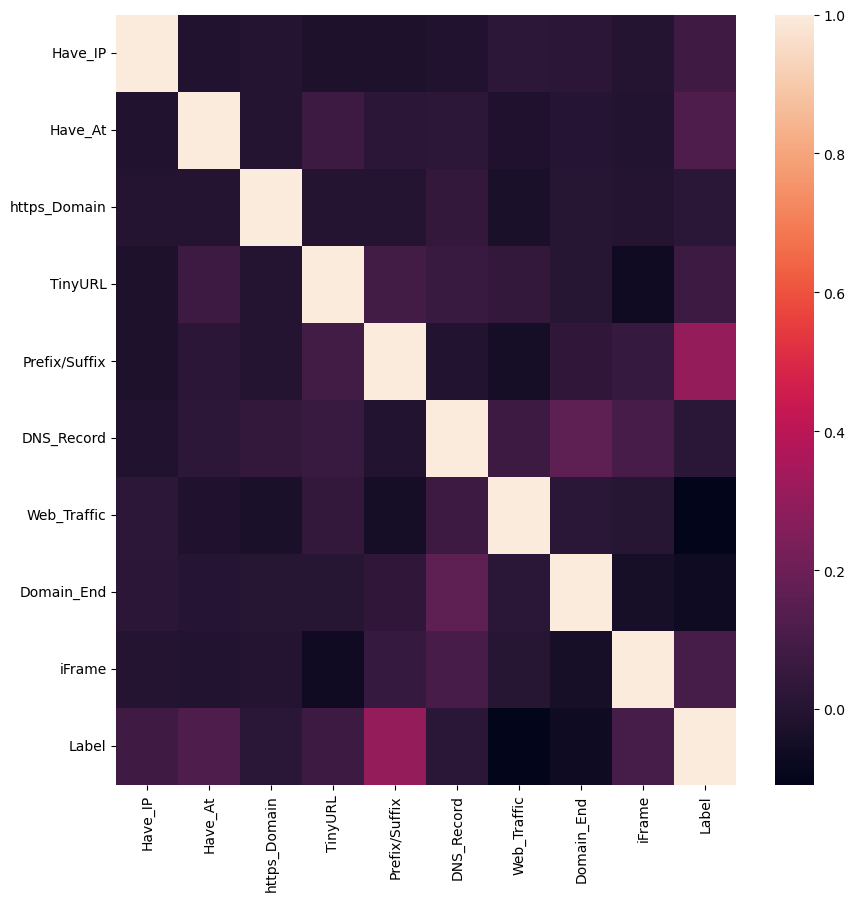

In [33]:
data = urldata.drop(columns=['Domain'])
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())
plt.show()

In [ ]:
urldata.describe().T

In [ ]:
#Dropping the Domain column
df = urldata.drop(['Domain'], axis = 1).copy()
df

This leaves us with 9 features & a target column.

In the feature extraction file, the extracted features of legitmate & phishing url datasets are concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = df.sample(frac=1).reset_index(drop=True)
data.head()

In [ ]:
data.isnull().sum()

### Splitting the data

In [ ]:
# Sepratating & assigning features and target columns to X & y respectively
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

In [ ]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

## Machine Learning Model Application
We can observe from the above dataset, that it is Supervised Machine Learning. Supervised Machine learning has two types of problems:
- Regression
- Classification

We can observe that the above problem is classification problem as input url is classified as Phishing(1) or Legitimate(0).

The supervised machine learning models (classification) considered to train the dataset in this notebook are:

- Decision Tree
- Random Forest
- XGBoost
- Support Vector Machines

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# initiate the model 
dtc = DecisionTreeClassifier(max_depth=5,random_state=12)
# fit the model 
dtc.fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
y_test = dtc.predict(X_test)
y_train = dtc.predict(X_train)

**PERFORMANCE EVALUATION**

In [ ]:
#computing the accuracy of the model performance
acc_train_dtc = accuracy_score(y_train,y_train)
acc_test_dtc = accuracy_score(y_test,y_test)

print("Decision Tree: Accuracy on training Data:",acc_train_dtc)
print("Decision Tree: Accuracy on test Data:",acc_test_dtc)

#### Random Forest

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rf = RandomForestClassifier(max_depth=5,random_state=12)

# fit the model 
rf.fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = rf.predict(X_test)
y_train_forest = rf.predict(X_train)

**PERFORMANCE EVALUATION**

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data:",acc_train_forest)
print("Random forest: Accuracy on test Data:",acc_test_forest)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_test_forest)

print("Confusion Matrix:")
print(cm)

### XGBoost

XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
from xgboost import XGBClassifier

# initiate the model
xgb = XGBClassifier(max_depth=5)
#fit the model
xgb.fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:

#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data:",acc_train_xgb)
print("XGBoost : Accuracy on test Data:",acc_test_xgb)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_test_xgb)

print("Confusion Matrix:")
print(cm)

### Support Vector Machine (SVM)
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', random_state=12)
#fit the model
svm.fit(X_train, y_train)

In [ ]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data:",acc_train_svm)
print("SVM : Accuracy on test Data:",acc_test_svm)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_test_svm)

print("Confusion Matrix:")
print(cm)

#### For 80-20 data split, the RESULTS are:

Decision Tree: Accuracy on training Data: 1.0
Decision Tree: Accuracy on test Data: 1.0

Random forest: Accuracy on training Data: 0.99525
Random forest: Accuracy on test Data: 0.998

Confusion Matrix:
[[1615    0]
 [   4  381]]

XGBoost: Accuracy on training Data: 1.0
XGBoost : Accuracy on test Data: 1.0

SVM: Accuracy on training Data: 0.985875
SVM : Accuracy on test Data: 0.9905

Confusion Matrix:
[[1600   15]
 [   4  381]]


#### For 70-30 data split, the RESULTS are:

Decision Tree: Accuracy on training Data: 1.0
Decision Tree: Accuracy on test Data: 1.0

Random forest: Accuracy on training Data: 0.9957142857142857
Random forest: Accuracy on test Data: 0.996

Confusion Matrix:
[[2365    0]
 [  12  623]]

XGBoost: Accuracy on training Data: 1.0
XGBoost : Accuracy on test Data: 1.0

Confusion Matrix:
[[2365    0]
 [   0  635]]

SVM: Accuracy on training Data: 0.9874285714285714
SVM : Accuracy on test Data: 0.9863333333333333

Confusion Matrix:
[[2336   29]
 [  12  623]]

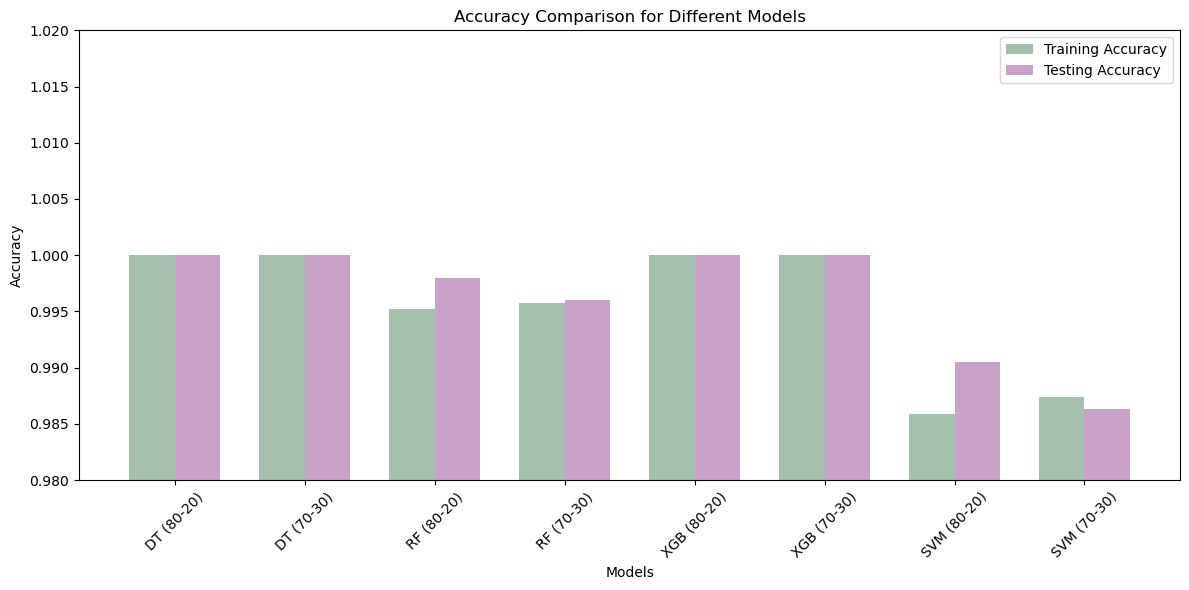

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['DT (80-20)', 'DT (70-30)', 'RF (80-20)', 'RF (70-30)', 'XGB (80-20)', 'XGB (70-30)', 'SVM (80-20)', 'SVM (70-30)']

# Accuracy data (training and testing)
train_accuracy = [1.0, 1.0, 0.99525, 0.99571, 1.0, 1.0, 0.985875, 0.98742]
test_accuracy = [1.0, 1.0, 0.998, 0.996, 1.0, 1.0, 0.9905, 0.98633]

# Bar width
bar_width = 0.35
index = np.arange(len(models))

# Plotting the bar chart with light pastel colors and side-by-side bars
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index - bar_width/2, train_accuracy, bar_width, label='Training Accuracy', color='#a3c1ad')  # Light Green
bar2 = ax.bar(index + bar_width/2, test_accuracy, bar_width, label='Testing Accuracy', color='#c8a2c8')  # Light Purple

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.ylim(0.98, 1.02)  # Set y-axis limit to zoom in on the accuracy range
plt.tight_layout()
plt.show()


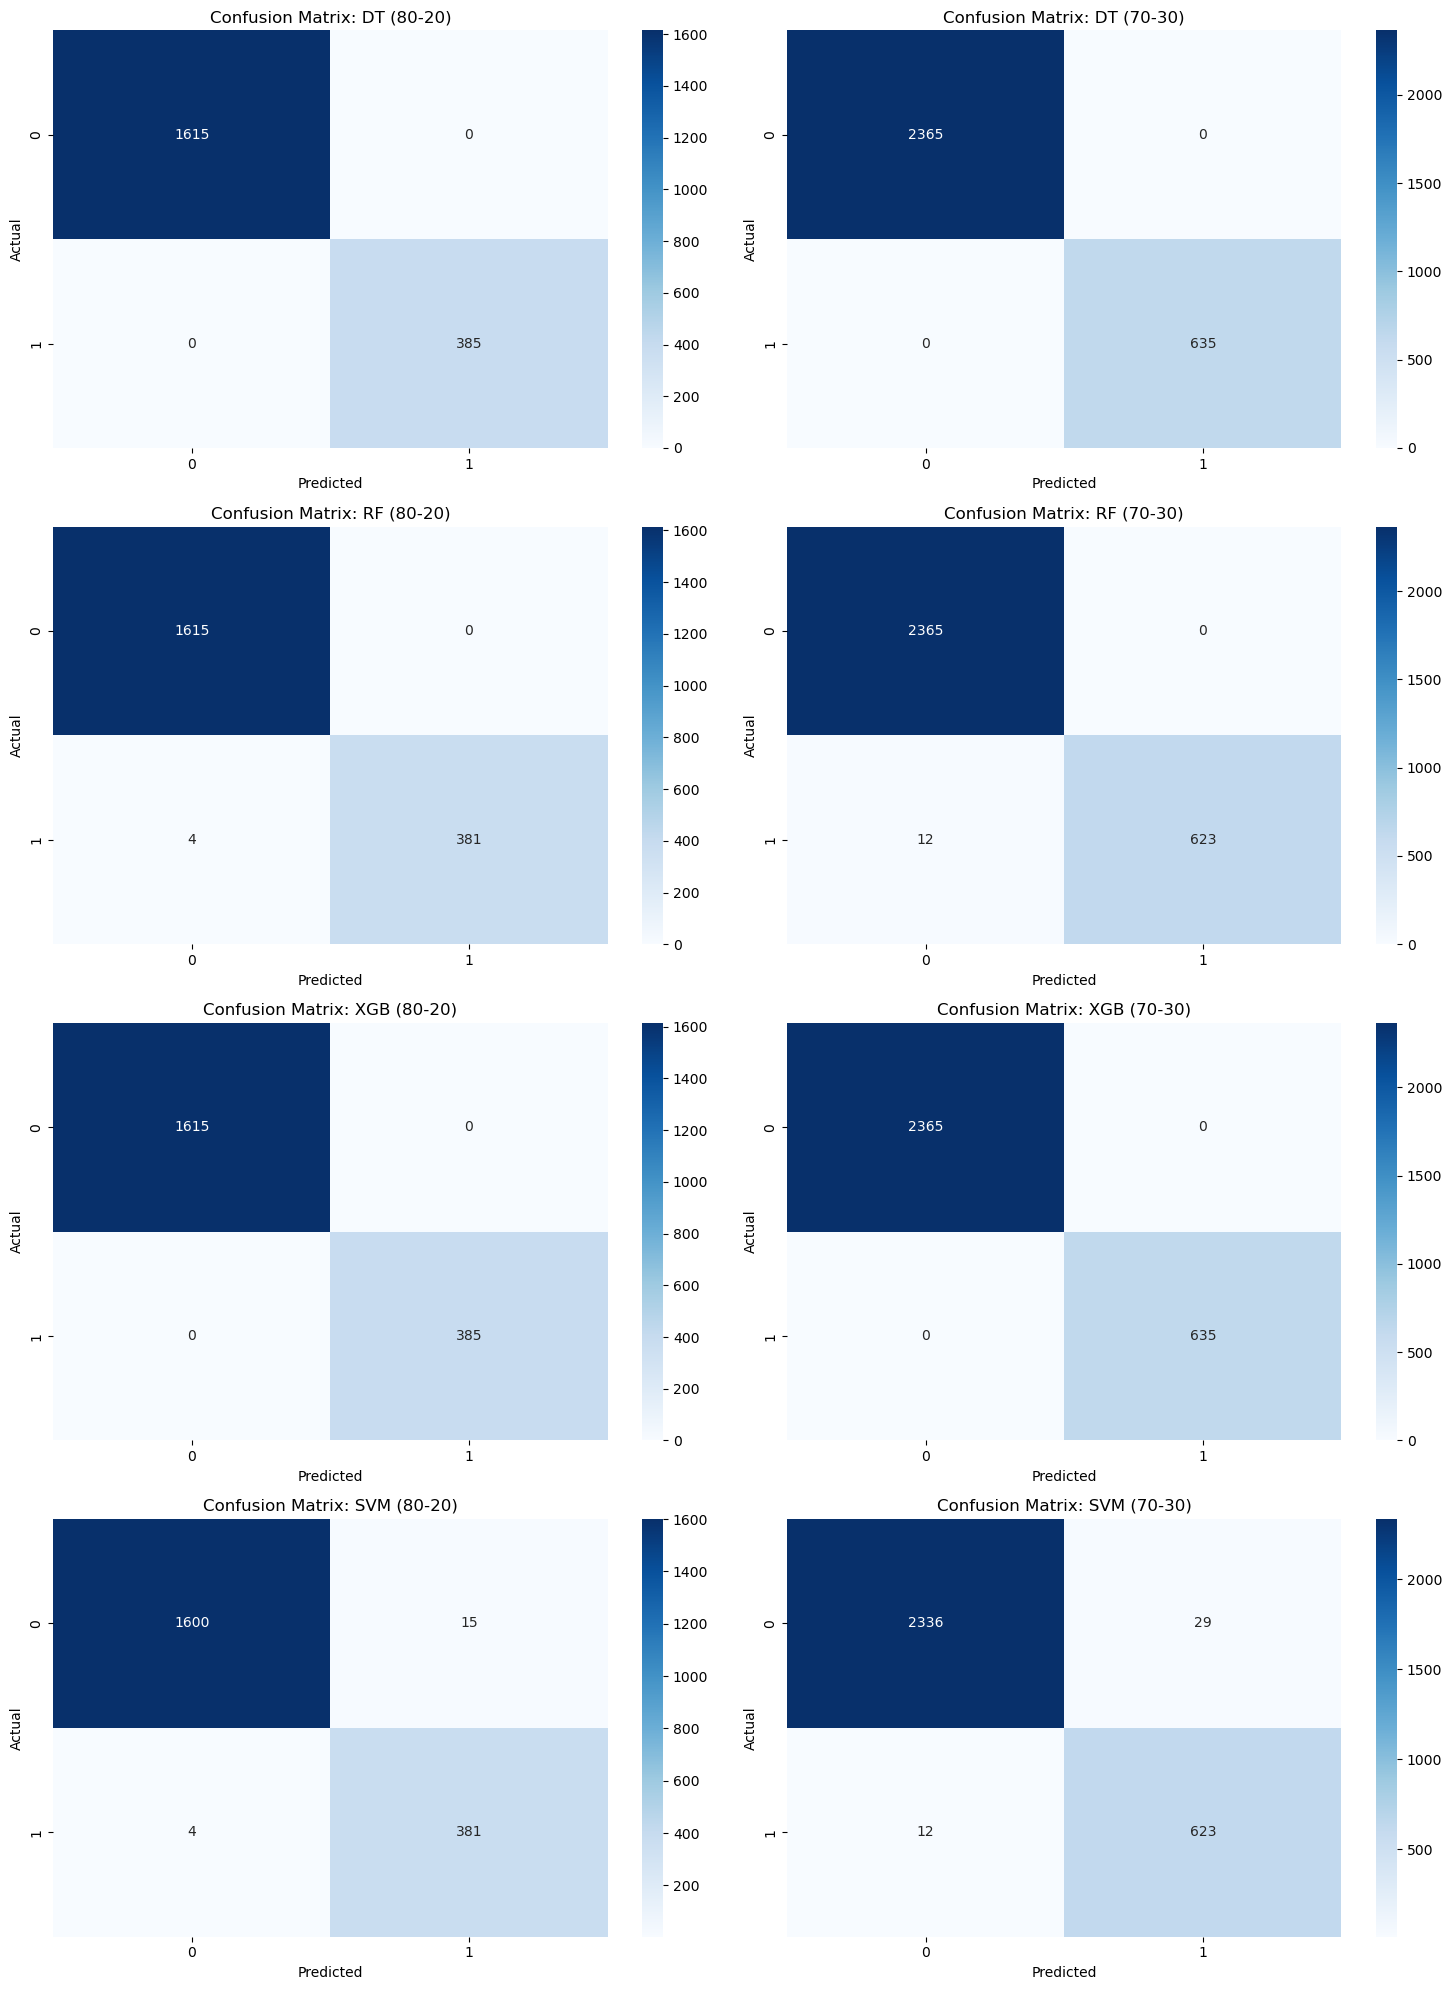

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrices for each model
conf_matrices = {
    'DT (80-20)': [[1615, 0], [0, 385]],
    'DT (70-30)': [[2365, 0], [0, 635]],
    'RF (80-20)': [[1615, 0], [4, 381]],
    'RF (70-30)': [[2365, 0], [12, 623]],
    'XGB (80-20)': [[1615, 0], [0, 385]],
    'XGB (70-30)': [[2365, 0], [0, 635]],
    'SVM (80-20)': [[1600, 15], [4, 381]],
    'SVM (70-30)': [[2336, 29], [12, 623]],
}

# Plotting the heatmaps
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for ax, (title, cm) in zip(axes.flatten(), conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


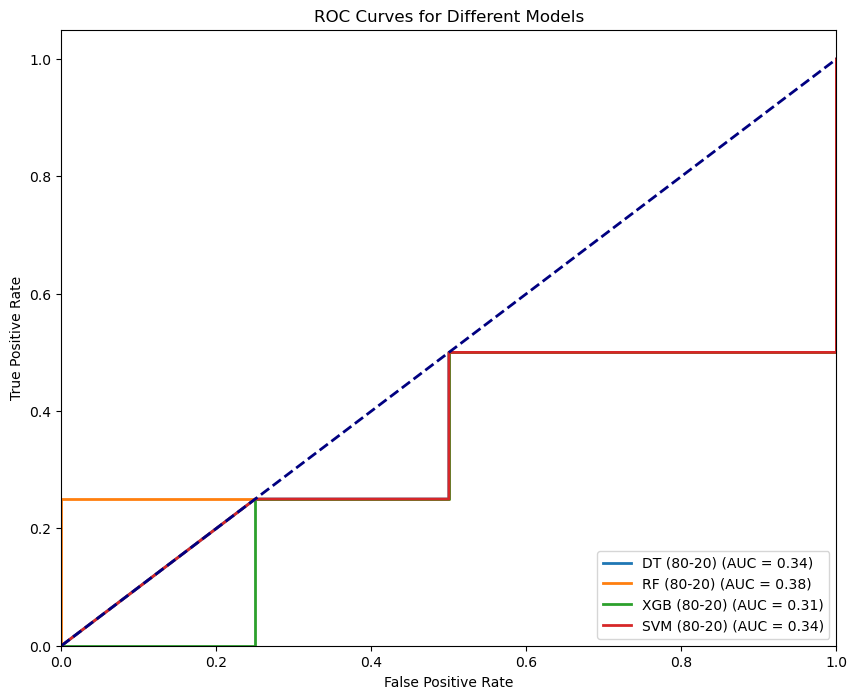

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Replace with your actual true labels and predicted probabilities
y_true = [0, 1, 0, 1, 1, 0, 0, 1]  # Example true labels
y_probs = {
    'DT (80-20)': [0.9, 0.1, 0.8, 0.2, 0.7, 0.6, 0.3, 0.9],  # Example probabilities
    'RF (80-20)': [0.85, 0.15, 0.78, 0.22, 0.65, 0.55, 0.35, 0.88],
    'XGB (80-20)': [0.95, 0.05, 0.88, 0.12, 0.75, 0.65, 0.25, 0.92],
    'SVM (80-20)': [0.9, 0.1, 0.85, 0.15, 0.7, 0.5, 0.4, 0.9]
}

# Plotting ROC curves
plt.figure(figsize=(10, 8))

for model, probs in y_probs.items():
    fpr, tpr, _ = roc_curve(y_true, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

